<a href="https://colab.research.google.com/github/marianatiele/AprendizadoMaquina_Projetos/blob/main/Arvore_Decisao_Acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tentando fazer uma árvore de decisão**

Usando as ações da Petrobras para prever o valor dela no ano seguinte

In [67]:
# !pip install yfinance

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, max_error
# plotar
from matplotlib import pyplot as plt
import seaborn as sns
# base dados
import yfinance  as yf
# plotar a árvore
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

**Baixando a base completa**

acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA']

dados = yf.download(acoes, start='2015-01-02', end='2017-12-20')['Close']

In [116]:
acoes = ['PETR4.SA']
dados = yf.download(acoes, start='2015-01-02', end='2017-12-20')

[*********************100%%**********************]  1 of 1 completed


In [117]:
dados.shape

(741, 6)

In [159]:
dados.isnull().sum()

Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [118]:
dados.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-18,15.16,15.33,15.13,15.22,5.396612,42760400
2017-12-19,15.18,15.25,15.06,15.14,5.368246,22639700


In [127]:
#Removendo a classe de
dados = dados.drop(['Close'],axis=1)

**Renomear os dados**
def renomear(dados):
   dados.rename(columns = {
     'BBDC4.SA' : 'BRADESCO',
     'ITUB4.SA' : 'ITAU',
     'PETR4.SA' :'PETROBRAS',
    'VALE3.SA': 'VALE'
}, inplace= True)


In [121]:
# Baixar só os dados de fechamento
acoes = ['PETR4.SA']
Petrobras = yf.download(acoes, start='2018-01-02', end='2020-12-30')['Close']

[*********************100%%**********************]  1 of 1 completed


In [160]:
Petrobras.isnull().sum()

0

In [122]:
Petrobras.tail(2)

Date
2020-12-28    28.18
2020-12-29    28.27
Name: Close, dtype: float64

In [128]:
type(Petrobras), type(dados)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

## Separando os dados

In [129]:
dados.shape, Petrobras.shape

((741, 5), (741,))

In [130]:
dados.head(3)

,Open,High,Low,Adj Close,Volume
Date,,,,,
2015-01-02,9.99,9.99,9.35,3.318810,49559500
2015-01-05,9.14,9.19,8.53,3.035151,78385100
2015-01-06,8.71,8.83,8.04,2.935871,84723300


In [132]:
#Não vou usar o test_size nem o trein_size
x_treino, x_teste, y_treino, y_teste = train_test_split(dados, Petrobras, random_state=0)

In [133]:
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((555, 5), (186, 5), (555,), (186,))

In [ ]:
# x_treino
# x_teste
# y_treino
# y_teste

##Treinando o modelo

In [138]:
def treinaModelo(x_treino, y_treino):
  arvore = DecisionTreeRegressor(random_state = 0)
  arvore.fit(x_treino, y_treino)
  return arvore

In [140]:
arvore= treinaModelo(x_treino, y_treino)
arvore

DecisionTreeRegressor(random_state=0)

In [141]:
previsao = arvore.predict(x_teste)
# previsao

array([25.92000008, 26.76000023, 27.79999924, 20.40999985, 26.23999977,
       27.02000046, 17.71999931, 23.69000053, 26.21999931, 25.52000046,
       27.26000023, 19.44000053, 21.45999908, 19.        , 25.54999924,
       26.20000076, 21.65999985, 21.78000069, 18.29000092, 25.5       ,
       26.76000023, 14.5       , 25.12999916, 23.95999908, 18.29000092,
       28.        , 17.95000076, 21.67000008, 24.70999908, 15.17000008,
       18.79999924, 23.54999924, 27.34000015, 22.81999969, 20.60000038,
       20.84000015, 22.79000092, 27.28000069, 16.90999985, 16.37999916,
       27.37999916, 25.52000046, 26.84000015, 20.70999908, 29.81999969,
       22.45000076, 20.84000015, 26.76000023, 20.60000038, 27.10000038,
       28.45000076, 18.20000076, 17.31999969, 22.82999992, 16.37999916,
       19.39999962, 30.5       , 13.09000015, 26.79000092, 26.85000038,
       27.5       , 26.29000092, 26.87999916, 19.44000053, 29.81999969,
       24.71999931, 19.87999916, 17.87999916, 21.40999985, 26.84

In [142]:
previsao.shape, y_teste.shape

((186,), (186,))

In [ ]:
# previsao

In [144]:
y_teste

Date
2018-10-15    25.770000
2018-10-01    21.000000
2018-01-22    18.469999
2018-02-16    19.420000
2019-08-08    26.350000
                ...    
2020-08-03    21.799999
2018-02-22    20.740000
2020-02-18    29.750000
2020-03-02    26.530001
2019-03-13    28.100000
Name: Close, Length: 186, dtype: float64

In [ ]:
# x_teste

In [145]:
previsao = arvore.predict(x_teste)
previsao

array([25.92000008, 26.76000023, 27.79999924, 20.40999985, 26.23999977,
       27.02000046, 17.71999931, 23.69000053, 26.21999931, 25.52000046,
       27.26000023, 19.44000053, 21.45999908, 19.        , 25.54999924,
       26.20000076, 21.65999985, 21.78000069, 18.29000092, 25.5       ,
       26.76000023, 14.5       , 25.12999916, 23.95999908, 18.29000092,
       28.        , 17.95000076, 21.67000008, 24.70999908, 15.17000008,
       18.79999924, 23.54999924, 27.34000015, 22.81999969, 20.60000038,
       20.84000015, 22.79000092, 27.28000069, 16.90999985, 16.37999916,
       27.37999916, 25.52000046, 26.84000015, 20.70999908, 29.81999969,
       22.45000076, 20.84000015, 26.76000023, 20.60000038, 27.10000038,
       28.45000076, 18.20000076, 17.31999969, 22.82999992, 16.37999916,
       19.39999962, 30.5       , 13.09000015, 26.79000092, 26.85000038,
       27.5       , 26.29000092, 26.87999916, 19.44000053, 29.81999969,
       24.71999931, 19.87999916, 17.87999916, 21.40999985, 26.84

In [151]:
r2_score(y_teste, previsao)

-0.37467379309260007

'''A função max_error é uma métrica que calcula o maior erro absoluto entre as previsões e os valores reais.
 Basicamente, ela retorna o maior valor absoluto das diferenças entre os valores previstos e os valores reais.'''

In [158]:
max_error(y_teste, previsao)

14.049999237060547

In [107]:
# baixar a arvore e olhar no site
# export_graphviz(arvore, out_file ='tree.dot')

In [108]:
# #Arvore de decisão
# plt.figure(figsize=(15,10))
# plot_tree(arvore, filled=True, feature_names=classe, class_names=classe)
# plt.title('Árvore de Decisão')
# plt.show()

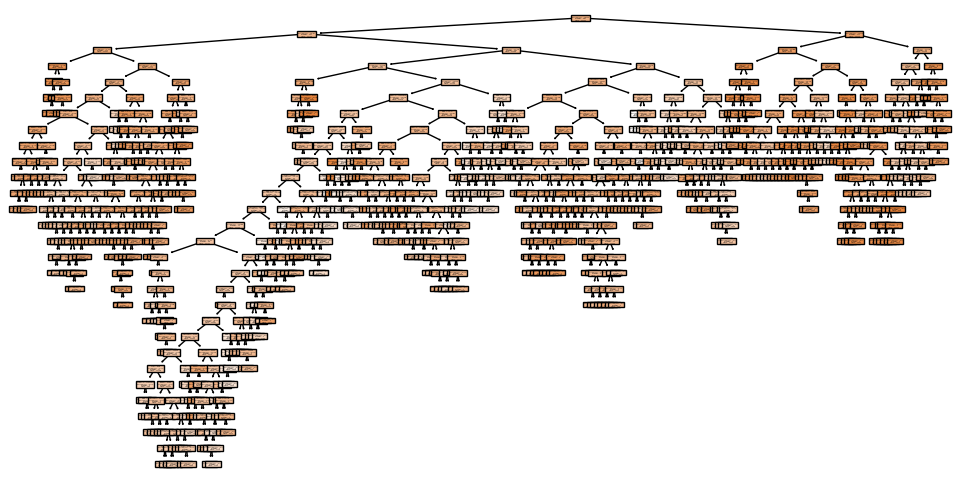

In [162]:
plt.figure(figsize=(12, 6))
plot_tree(arvore, feature_names=dados.columns, filled=True)
plt.show()